### **Projeto 3 **
Depois de otimizar uma carteira, é interessante entender qual o risco *real*. Qual a perda máxima que posso esperar em um dia ruim?". A resposta para isso é o **Value at Risk (VaR)**.

#### **Título do Projeto para o Currículo:**

*Cálculo de Value at Risk (VaR) para uma Carteira de Ações Otimizada*

#### **Objetivo:**

Estimar a perda financeira máxima esperada para a carteira de máximo Índice de Sharpe (calculada no Projeto 2) em um determinado horizonte de tempo (1 dia), com níveis de confiança de 95% e 99%. Usaremos o método de **simulação histórica**, que é o mais intuitivo.


/tmp/ipython-input-1-1097050282.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1097050282.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1097050282.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1097050282.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[****

--- Etapa 3: Calculando o Value at Risk (VaR) Histórico ---

Valor do Portfólio: R$ 1,000,000.00
--------------------------------------------------
VaR Histórico (95%, 1 dia): -2.28% | R$ -22,807.96
VaR Histórico (99%, 1 dia): -4.10% | R$ -41,026.81
--------------------------------------------------

Interpretação:
Com 95% de confiança, a perda máxima esperada para esta carteira em um único dia não deve exceder R$ 22,807.96.
Em um cenário mais extremo (com 99% de confiança), a perda máxima diária não deve ultrapassar R$ 41,026.81.


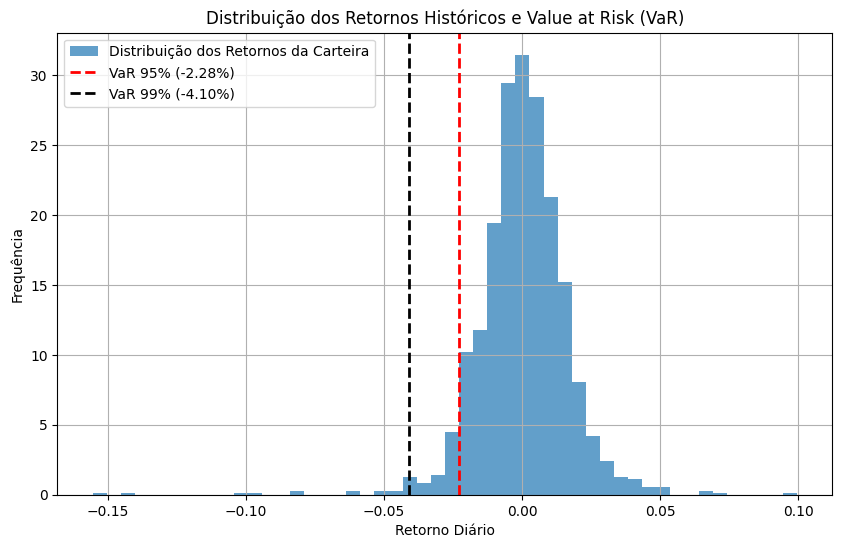

In [ ]:

# -------------------------------------------------------------------
# PROJETO 3: CÁLCULO DE VALUE AT RISK (VAR)
# -------------------------------------------------------------------

# Importando as bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- PASSO 1: Recriar a carteira ótima do Projeto 2 ---

tickers = ['VALE3.SA', 'ITUB4.SA', 'MGLU3.SA', 'WEGE3.SA']
start_date = '2020-01-01'
end_date = '2025-01-01'

precos = pd.DataFrame()
for ticker in tickers:
    precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

retornos = np.log(precos / precos.shift(1)).dropna()

# Suponha que sua carteira ótima do Projeto 2 tenha tido a seguinte alocação:
pesos_otimos = np.array([0.15, 0.40, 0.05, 0.40]) # Exemplo: 15% VALE, 40% ITUB, 5% MGLU, 40% WEGE

# --- PASSO 2: Calcular os retornos históricos da carteira otimizada ---

# Multiplicamos os retornos diários de cada ativo pelo seu peso na carteira
retornos_carteira = retornos.dot(pesos_otimos)

# --- PASSO 3: Calcular o VaR Histórico ---

print("--- Etapa 3: Calculando o Value at Risk (VaR) Histórico ---")
# Define o valor do investimento inicial
valor_investido = 1000000  # R$ 1.000.000,00

# Calcula o VaR para diferentes níveis de confiança
# Usaremos a função percentile do NumPy
VaR_95 = np.percentile(retornos_carteira, 5)  # 5% representa os piores 5% dos casos
VaR_99 = np.percentile(retornos_carteira, 1)  # 1% representa o pior 1% dos casos

# Converte o VaR percentual para valor monetário
VaR_95_monetario = valor_investido * VaR_95
VaR_99_monetario = valor_investido * VaR_99

print(f"\nValor do Portfólio: R$ {valor_investido:,.2f}")
print("-" * 50)
print(f"VaR Histórico (95%, 1 dia): {VaR_95*100:.2f}% | R$ {VaR_95_monetario:,.2f}")
print(f"VaR Histórico (99%, 1 dia): {VaR_99*100:.2f}% | R$ {VaR_99_monetario:,.2f}")
print("-" * 50)
print("\nInterpretação:")
print(f"Com 95% de confiança, a perda máxima esperada para esta carteira em um único dia não deve exceder R$ {-VaR_95_monetario:,.2f}.")
print(f"Em um cenário mais extremo (com 99% de confiança), a perda máxima diária não deve ultrapassar R$ {-VaR_99_monetario:,.2f}.")

# --- PASSO 4: Visualização ---
plt.figure(figsize=(10, 6))
plt.hist(retornos_carteira, bins=50, density=True, alpha=0.7, label='Distribuição dos Retornos da Carteira')
plt.axvline(x=VaR_95, color='r', linestyle='--', linewidth=2, label=f'VaR 95% ({VaR_95*100:.2f}%)')
plt.axvline(x=VaR_99, color='k', linestyle='--', linewidth=2, label=f'VaR 99% ({VaR_99*100:.2f}%)')
plt.title('Distribuição dos Retornos Históricos e Value at Risk (VaR)')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()